In [1]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time
import datetime
import seaborn as sns

In [ ]:
#https://github.com/borisbanushev/stockpredictionai/blob/master/readme2.md#corrassets

In [22]:
def parser(x):
    return datetime.datetime.strptime(x,'%Y-%m-%d')

In [74]:
START_DATE = "2006-01-01"
END_DATE = "2021-12-31"
SPLIT_FACTOR = 0.8

In [65]:
raw_data = pd.read_csv(r'data\raw_df.csv', header=0, parse_dates=[0], date_parser=parser)#S&P 500 1990 - 2021
mask = (raw_data['Date'] > START_DATE) & (raw_data['Date'] <= END_DATE)
stock_df = raw_data.loc[mask]
stock_df.reset_index(inplace = True, drop = True)
stock_df

,Date,High,Low,Open,Close,Volume,Adj Close,ewm_short,ma_short,rsi,macd,bolu,bold
0,2006-01-03,1270.219971,1245.739990,1248.290039,1268.800049,2554570000,1268.800049,1258.822193,1262.268578,58.147309,3.663489,1273.376776,1251.709227
1,2006-01-04,1275.369995,1267.739990,1268.800049,1273.459961,2515330000,1273.459961,1260.152899,1262.667626,60.572487,4.422390,1274.673589,1251.455081
2,2006-01-05,1276.910034,1270.300049,1273.459961,1273.479980,2433340000,1273.479980,1261.364452,1263.210007,60.583054,4.968170,1275.852215,1251.010126
3,2006-01-06,1286.089966,1273.479980,1273.479980,1285.449951,2446560000,1285.449951,1263.554043,1264.245722,66.384407,6.294028,1279.099044,1250.089295
4,2006-01-09,1290.780029,1284.819946,1285.449951,1290.150024,2301490000,1290.150024,1265.971859,1265.806676,68.353935,7.636013,1283.591358,1248.784981
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023,2021-12-27,4791.490234,4733.990234,4733.990234,4791.189941,2264120000,4791.189941,4665.205811,4644.646229,61.358473,24.313332,4766.156623,4523.965789
4024,2021-12-28,4807.020020,4780.040039,4795.490234,4786.350098,2217050000,4786.350098,4676.218928,4653.776228,60.863656,30.850591,4788.911557,4515.208527
4025,2021-12-29,4804.060059,4778.080078,4788.640137,4793.060059,2369370000,4793.060059,4686.840849,4660.337658,61.329270,36.156068,4808.662580,4515.530177
4026,2021-12-30,4808.930176,4775.330078,4794.229980,4778.729980,2390990000,4778.729980,4695.194407,4670.420038,59.695830,38.757607,4821.781582,4525.302516


In [66]:
stock_df.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume                int64
Adj Close           float64
ewm_short           float64
ma_short            float64
rsi                 float64
macd                float64
bolu                float64
bold                float64
dtype: object

In [77]:
num_training_days = int(stock_df.shape[0]*SPLIT_FACTOR)
split_point = stock_df[num_training_days: num_training_days+1].values[0][0]
year = split_point.year
month = split_point.month
day = split_point.day
print(f"Number of training days: {num_training_days}. Number of test days: {stock_df.shape[0]-num_training_days}.")
print(f"Split date is: {split_point}. Index is: {stock_df[num_training_days: num_training_days+1].index.values[0]}")

Number of training days: 3222. Number of test days: 806.
Split date is: 2018-10-19 00:00:00. Index is: 3222


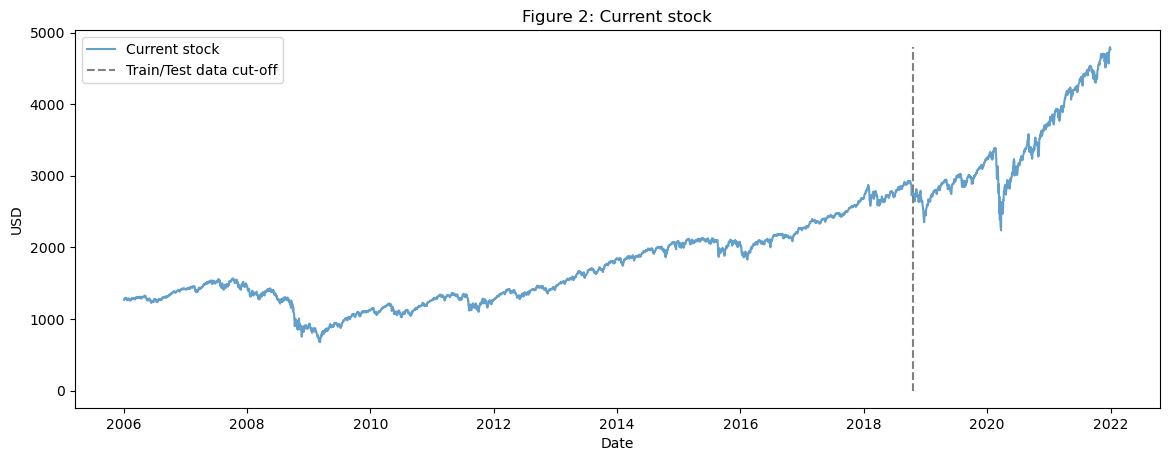

In [78]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(stock_df['Date'], stock_df['Adj Close'], label='Current stock', alpha = 0.7)
plt.vlines(datetime.date(year,month, day), 0, stock_df['Adj Close'].max(), linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 2: Current stock')
plt.legend()
plt.show()
# 2018,12, 31

In [81]:
stock_df.describe().T

,count,mean,std,min,25%,50%,75%,max
High,4028.0,2.015486e+03,8.990756e+02,6.952700e+02,1.319875e+03,1.810980e+03,2.597220e+03,4.808930e+03
Low,4028.0,1.992895e+03,8.926418e+02,6.667900e+02,1.305305e+03,1.801060e+03,2.573115e+03,4.780040e+03
Open,4028.0,2.004588e+03,8.958561e+02,6.792800e+02,1.312940e+03,1.806440e+03,2.583007e+03,4.795490e+03
Close,4028.0,2.005018e+03,8.961738e+02,6.765300e+02,1.313160e+03,1.806520e+03,2.585130e+03,4.793060e+03
Volume,4028.0,3.883819e+09,1.185711e+09,8.325500e+08,3.166645e+09,3.653490e+09,4.347178e+09,1.145623e+10
Adj Close,4028.0,2.005018e+03,8.961738e+02,6.765300e+02,1.313160e+03,1.806520e+03,2.585130e+03,4.793060e+03
ewm_short,4028.0,1.996468e+03,8.854133e+02,7.458784e+02,1.311468e+03,1.799605e+03,2.597770e+03,4.701648e+03
ma_short,4028.0,1.996443e+03,8.857508e+02,7.390005e+02,1.309017e+03,1.801951e+03,2.580869e+03,4.682474e+03
rsi,4028.0,5.512435e+01,1.115215e+01,1.645758e+01,4.735855e+01,5.639875e+01,6.353126e+01,8.668665e+01
macd,4028.0,5.918474e+00,2.339019e+01,-2.370202e+02,-3.024853e+00,8.211559e+00,1.665604e+01,9.070304e+01


In [91]:
corr = stock_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,High,Low,Open,Close,Volume,Adj Close,ewm_short,ma_short,rsi,macd,bolu,bold
High,1.000000,0.999802,0.999907,0.999871,-0.125676,0.999871,0.999096,0.998612,0.178049,0.338510,0.996778,0.997882
Low,0.999802,1.000000,0.999854,0.999888,-0.136859,0.999888,0.998481,0.997909,0.188414,0.349242,0.995476,0.997838
Open,0.999907,0.999854,1.000000,0.999767,-0.129969,0.999767,0.998900,0.998383,0.179988,0.343531,0.996269,0.997966
Close,0.999871,0.999888,0.999767,1.000000,-0.131663,1.000000,0.998729,0.998194,0.186136,0.343997,0.996077,0.997769
Volume,-0.125676,-0.136859,-0.129969,-0.131663,1.000000,-0.131663,-0.119667,-0.118333,-0.265100,-0.262630,-0.094672,-0.143523
Adj Close,0.999871,0.999888,0.999767,1.000000,-0.131663,1.000000,0.998729,0.998194,0.186136,0.343997,0.996077,0.997769
ewm_short,0.999096,0.998481,0.998900,0.998729,-0.119667,0.998729,1.000000,0.999901,0.148436,0.307209,0.998669,0.998458
ma_short,0.998612,0.997909,0.998383,0.998194,-0.118333,0.998194,0.999901,1.000000,0.142988,0.301965,0.998776,0.998536
rsi,0.178049,0.188414,0.179988,0.186136,-0.265100,0.186136,0.148436,0.142988,1.000000,0.660273,0.131273,0.155817
macd,0.338510,0.349242,0.343531,0.343997,-0.262630,0.343997,0.307209,0.301965,0.660273,1.000000,0.276020,0.331591


In [89]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(3, 1, 1)
    plt.plot(dataset['ma_short'],label='MA', color='g',linestyle='--')
    plt.plot(dataset['Adj Close'],label='Adj Close', color='b')
    plt.plot(dataset['bolu'],label='Bollinger Upper Band', color='c')
    plt.plot(dataset['bold'],label='Bollinger Lower Band', color='c')
    plt.fill_between(x_, dataset['bolu'], dataset['bold'], alpha=0.35)
    plt.title('Technical indicators for current stock - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot
    plt.subplot(3, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['macd'],label='MACD', linestyle='-.')
    plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.legend()
    
    plt.subplot(3, 1, 3)
    plt.plot(dataset['rsi'],label='RSI', color='b',linestyle='-')
    plt.legend()
    
    plt.show()

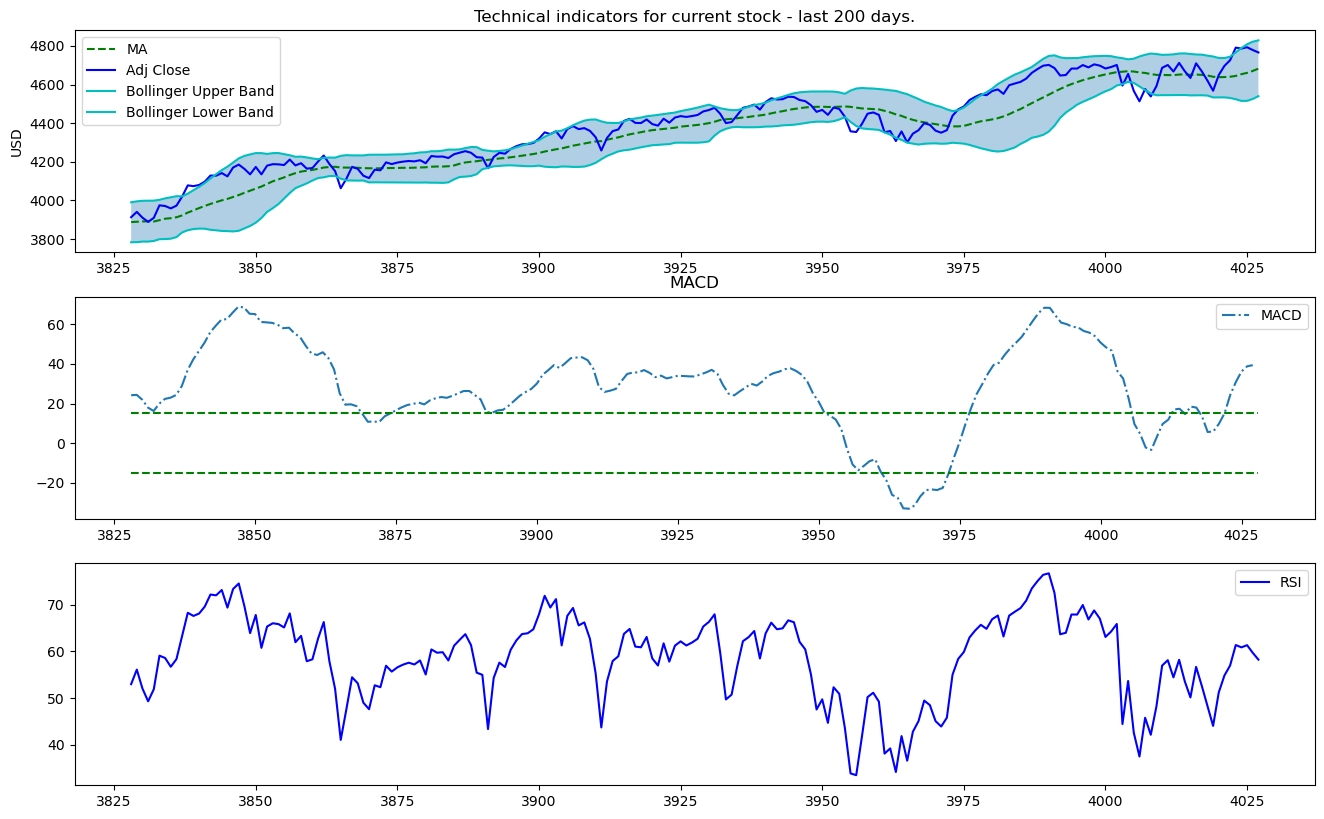

In [90]:
plot_technical_indicators(stock_df, 200)